<a href="https://colab.research.google.com/github/SuperXoma/Final-project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df

duration protocoltype   service flag  srcbytes  dstbytes  land  \
0              0          tcp  ftp_data   SF       491         0     0   
1              0          udp     other   SF       146         0     0   
2              0          tcp   private   S0         0         0     0   
3              0          tcp      http   SF       232      8153     0   
4              0          tcp      http   SF       199       420     0   
...          ...          ...       ...  ...       ...       ...   ...   
125968         0          tcp   private   S0         0         0     0   
125969         8          udp   private   SF       105       145     0   
125970         0          tcp      smtp   SF      2231       384     0   
125971         0          tcp    klogin   S0         0         0     0   
125972         0          tcp  ftp_data   SF       151         0     0   

        wrongfragment  urgent  hot  ...  dsthostsamesrvrate  \
0                   0       0    0  ...                0.17   
1                   0       0    0  ...                0.00   
2                   0       0    0  ...                0.10   
3                   0       0    0  ...                1.00   
4                   0       0    0  ...                1.00   
...               ...     ...  ...  ...                 ...   
125968              0       0    0  ...                0.10   
125969              0       0    0  ...                0.96   
125970              0       0    0  ...                0.12   
125971              0       0    0  ...                0.03   
125972              0       0    0  ...                0.30   

        dsthostdiffsrvrate  dsthostsamesrcportrate  dsthostsrvdiffhostrate  \
0                     0.03                    0.17                    0.00   
1                     0.60                    0.88                    0.00   
2                     0.05                    0.00                    0.00   
3                     0.00                    0.03                    0.04   
4                     0.00                    0.00                    0.00   
...                    ...                     ...                     ...   
125968                0.06                    0.00                    0.00   
125969                0.01                    0.01                    0.00   
125970                0.06                    0.00                    0.00   
125971                0.05                    0.00                    0.00   
125972                0.03                    0.30                    0.00   

        dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
0                    0.00                  0.00               0.05   
1                    0.00                  0.00               0.00   
2                    1.00                  1.00               0.00   
3                    0.03                  0.01               0.00   
4                    0.00                  0.00               0.00   
...                   ...                   ...                ...   
125968               1.00                  1.00               0.00   
125969               0.00                  0.00               0.00   
125970               0.72                  0.00               0.01   
125971               1.00                  1.00               0.00   
125972               0.00                  0.00               0.00   

        dsthostsrvrerrorrate   attack  lastflag  
0                       0.00   normal        20  
1                       0.00   normal        15  
2                       0.00  neptune        19  
3                       0.01   normal        21  
4                       0.00   normal        21  
...                      ...      ...       ...  
125968                  0.00  neptune        20  
125969                  0.00   normal        21  
125970                  0.00   normal        18  
125971                  0.00  neptune        20  
125972                  0.00   nor

In [306]:
df_test = pd.read_csv("Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df_test

duration protocoltype   service  flag  srcbytes  dstbytes  land  \
0             0          tcp   private   REJ         0         0     0   
1             0          tcp   private   REJ         0         0     0   
2             2          tcp  ftp_data    SF     12983         0     0   
3             0         icmp     eco_i    SF        20         0     0   
4             1          tcp    telnet  RSTO         0        15     0   
...         ...          ...       ...   ...       ...       ...   ...   
22539         0          tcp      smtp    SF       794       333     0   
22540         0          tcp      http    SF       317       938     0   
22541         0          tcp      http    SF     54540      8314     0   
22542         0          udp  domain_u    SF        42        42     0   
22543         0          tcp    sunrpc   REJ         0         0     0   

       wrongfragment  urgent  hot  ...  dsthostsamesrvrate  \
0                  0       0    0  ...                0.04   
1                  0       0    0  ...                0.00   
2                  0       0    0  ...                0.61   
3                  0       0    0  ...                1.00   
4                  0       0    0  ...                0.31   
...              ...     ...  ...  ...                 ...   
22539              0       0    0  ...                0.72   
22540              0       0    0  ...                1.00   
22541              0       0    2  ...                1.00   
22542              0       0    0  ...                0.99   
22543              0       0    0  ...                0.08   

       dsthostdiffsrvrate  dsthostsamesrcportrate  dsthostsrvdiffhostrate  \
0                    0.06                    0.00                    0.00   
1                    0.06                    0.00                    0.00   
2                    0.04                    0.61                    0.02   
3                    0.00                    1.00                    0.28   
4                    0.17                    0.03                    0.02   
...                   ...                     ...                     ...   
22539                0.06                    0.01                    0.01   
22540                0.00                    0.01                    0.01   
22541                0.00                    0.00                    0.00   
22542                0.01                    0.00                    0.00   
22543                0.03                    0.00                    0.00   

       dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
0                   0.00                   0.0               1.00   
1                   0.00                   0.0               1.00   
2                   0.00                   0.0               0.00   
3                   0.00                   0.0               0.00   
4                   0.00                   0.0               0.83   
...                  ...                   ...                ...   
22539               0.01                   0.0               0.00   
22540               0.01                   0.0               0.00   
22541               0.00                   0.0               0.07   
22542               0.00                   0.0               0.00   
22543               0.00                   0.0               0.44   

       dsthostsrvrerrorrate   attack  lastflag  
0                      1.00  neptune        21  
1                      1.00  neptune        21  
2                      0.00   normal        21  
3                      0.00    saint        15  
4                      0.71    mscan        11  
...                     ...      ...       ...  
22539                  0.00   normal        21  
22540                  0.00   normal        21  
22541                  0.07     back        15  
22542                  0.00   normal        21  
22543                  1.00    mscan        14  

[22544 rows x 43 columns]

In [307]:
combined_df = pd.concat([df, df_test], ignore_index=True)

In [308]:
combined_df.describe() #вывод статистической информации

duration      srcbytes      dstbytes           land  \
count  148517.000000  1.485170e+05  1.485170e+05  148517.000000   
mean      276.779305  4.022795e+04  1.708885e+04       0.000215   
std      2460.683131  5.409612e+06  3.703525e+06       0.014677   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.780000e+02  5.710000e+02       0.000000   
max     57715.000000  1.379964e+09  1.309937e+09       1.000000   

       wrongfragment         urgent            hot  numfailedlogins  \
count  148517.000000  148517.000000  148517.000000    148517.000000   
mean        0.020523       0.000202       0.189379         0.004323   
std         0.240069       0.019417       2.013160         0.072248   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000       0.000000         0.000000   
50%         0.000000       0.000000       0.000000         0.000000   
75%         0.000000       0.000000       0.000000         0.000000   
max         3.000000       3.000000     101.000000         5.000000   

            loggedin  numcompromised  ...  dsthostsrvcount  \
count  148517.000000   148517.000000  ...    148517.000000   
mean        0.402789        0.255062  ...       119.462661   
std         0.490461       22.231375  ...       111.232318   
min         0.000000        0.000000  ...         0.000000   
25%         0.000000        0.000000  ...        11.000000   
50%         0.000000        0.000000  ...        72.000000   
75%         1.000000        0.000000  ...       255.000000   
max         1.000000     7479.000000  ...       255.000000   

       dsthostsamesrvrate  dsthostdiffsrvrate  dsthostsamesrcportrate  \
count       148517.000000       148517.000000           148517.000000   
mean             0.534521            0.084103                0.145932   
std              0.448061            0.194102                0.308638   
min              0.000000            0.000000                0.000000   
25%              0.050000            0.000000                0.000000   
50%              0.600000            0.020000                0.000000   
75%              1.000000            0.070000                0.050000   
max              1.000000            1.000000                1.000000   

       dsthostsrvdiffhostrate  dsthostserrorrate  dsthostsrvserrorrate  \
count           148517.000000      148517.000000         148517.000000   
mean                 0.030584           0.256122              0.251304   
std                  0.108975           0.428500              0.429719   
min                  0.000000           0.000000              0.000000   
25%                  0.000000           0.000000              0.000000   
50%                  0.000000           0.000000              0.000000   
75%                  0.010000           0.600000              0.500000   
max                  1.000000           1.000000              1.000000   

       dsthostrerrorrate  dsthostsrvrerrorrate       lastflag  
count      148517.000000         148517.000000  148517.000000  
mean            0.136220              0.136397      19.278480  
std             0.322741              0.335282       2.739757  
min             0.000000              0.000000       0.000000  
25%             0.000000              0.000000      18.000000  
50%             0.000000              0.000000      20.000000  
75%             0.000000              0.000000      21.000000  
max             1.000000              1.000000      21.000000  

[8 rows x 39 columns]

Как мы видим, "land", "urgent", "numfailedlogins", "numoutboundcmds" имеют в основном нулевые значения, поэтому мы можем удалить эти столбцы.

In [309]:
combined_df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [310]:
combined_df.isnull().values.any() #Проверка отсутствующих значений NaN

False

In [311]:
combined_df.select_dtypes(include=['category', 'object']).columns #вывод категориальных переменных

Index(['protocoltype', 'service', 'flag', 'attack'], dtype='object')

In [312]:
combined_df['attack'].loc[combined_df['attack']!='normal']='attack' #заменяем все атаки на одно значение (для бинарной классификации)

In [313]:
count = combined_df['attack'].value_counts()

# Вывод количества значений
print(count)

# Построение гистограммы
count.plot(kind='bar')
plt.title('Количество значений "normal" и "attack"')
plt.xlabel('Тип атаки')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

attack
normal    77054
attack    71463
Name: count, dtype: int64


Видно, что классы сбалансированные

In [314]:
percentage_counts = combined_df['attack'].value_counts(normalize=True) * 100
print("Нормальный трафик:", percentage_counts.iloc[0], '%')
print("Трафик злоумышленника:", percentage_counts.iloc[1], '%')

Нормальный трафик: 51.88227610307238 %
Трафик злоумышленника: 48.11772389692762 %


In [315]:
le=LabelEncoder()

# Преобразуем столбец 'protocoltype' в числовые значения с помощью кодировщика LabelEncoder
combined_df['protocoltype'] = le.fit_transform(combined_df['protocoltype'])

# Преобразуем столбец 'service' в числовые значения с помощью кодировщика LabelEncoder
combined_df['service'] = le.fit_transform(combined_df['service'])

# Преобразуем столбец 'flag' в числовые значения с помощью кодировщика LabelEncoder
combined_df['flag'] = le.fit_transform(combined_df['flag'])

# Преобразуем столбец 'attack' в числовые значения с помощью кодировщика LabelEncoder
combined_df['attack'] = le.fit_transform(combined_df['attack'])

In [316]:
# Создаем фигуру и ось для отображения матрицы корреляций
f, ax = plt.subplots(1, 1, figsize=(35, 24))

# Вычисляем корреляцию между признаками нового сбалансированного DataFrame
correlation_matrix = combined_df.corr()

# Построим тепловую карту для визуализации матрицы корреляций
# Используем палитру 'coolwarm' для улучшения восприятия
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm', ax=ax)

# Устанавливаем заголовок к графику
ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)

# Отображаем график
plt.show()

По матрице корреляции видно, что некоторые признаки сильно коррелируют между собой (по сути обозначают одно и то же), из каждой пары удалим один признак


In [317]:
combined_df.drop(['numroot','serrorrate','rerrorrate','dsthostrerrorrate', 'srvserrorrate', 'dsthostserrorrate', 'srvrerrorrate',  ],axis=1,inplace=True)

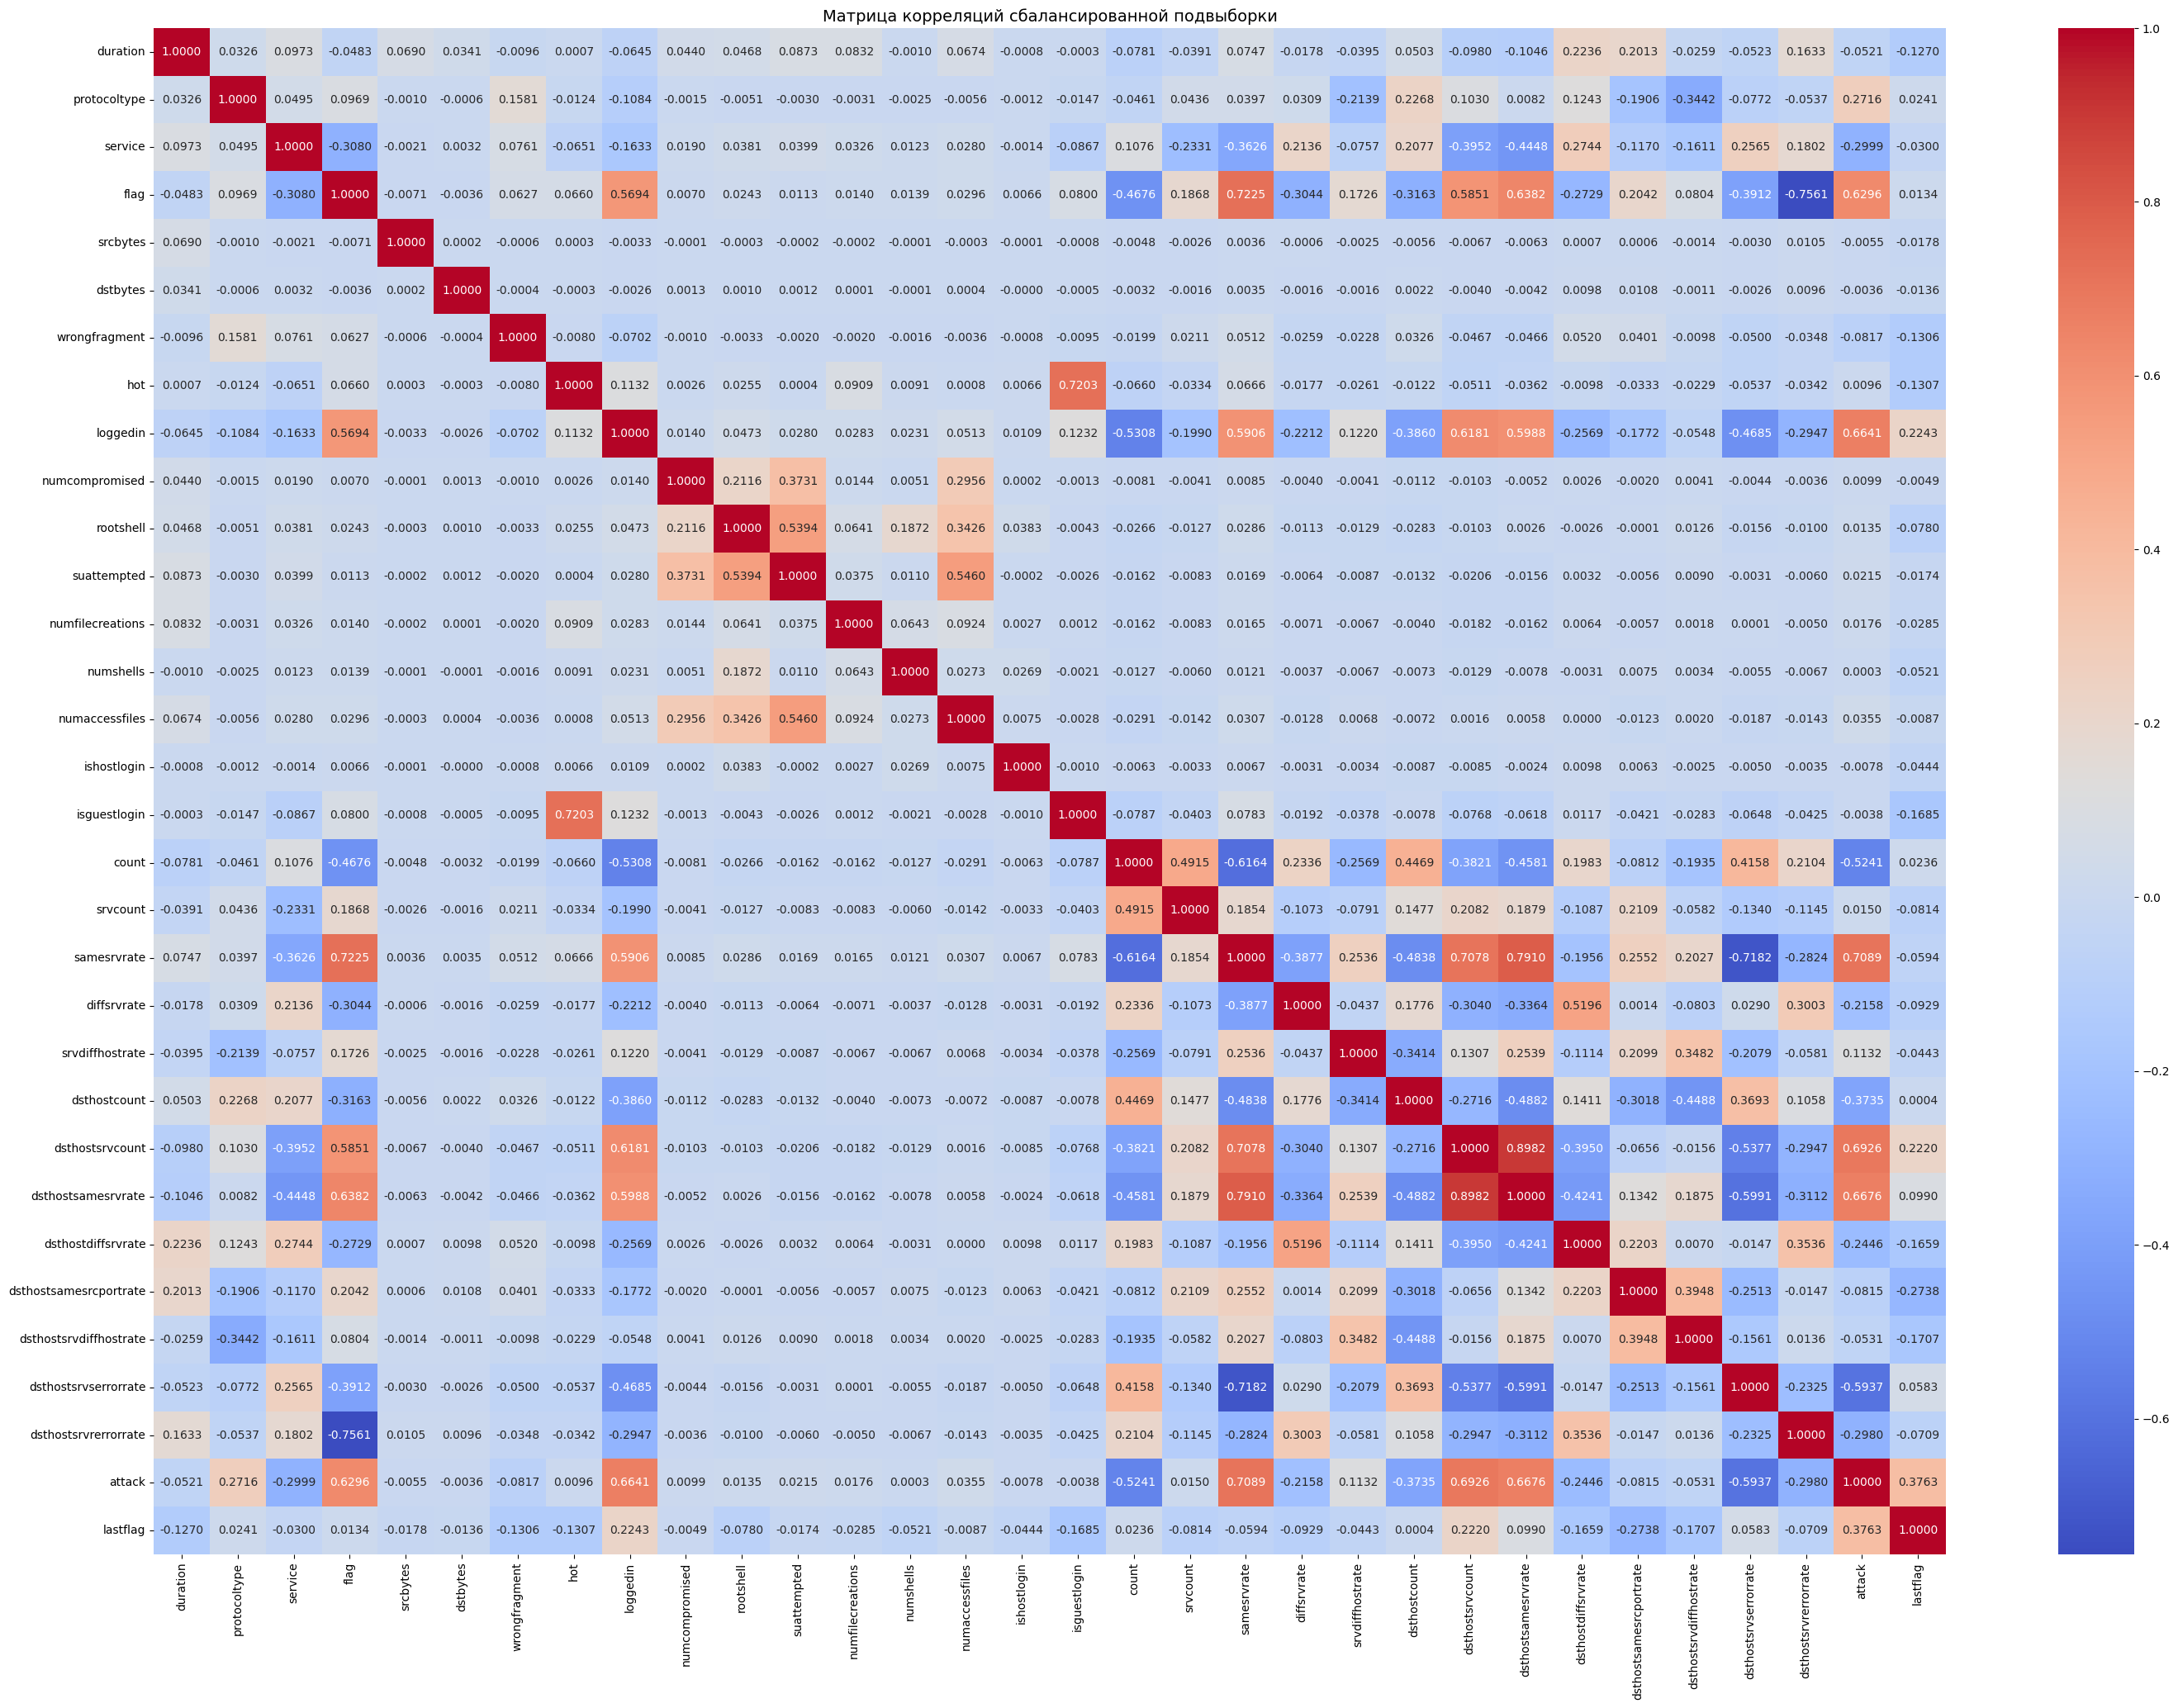

In [318]:
# Создаем фигуру и ось для отображения матрицы корреляций
f, ax = plt.subplots(1, 1, figsize=(35, 24))

# Вычисляем корреляцию между признаками нового сбалансированного DataFrame
correlation_matrix = combined_df.corr()

# Построим тепловую карту для визуализации матрицы корреляций
# Используем палитру 'coolwarm' для улучшения восприятия
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm', ax=ax)

# Устанавливаем заголовок к графику
ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)

# Отображаем график
plt.show()

In [319]:
X=combined_df.drop(['attack'],axis=1)
y=combined_df['attack']

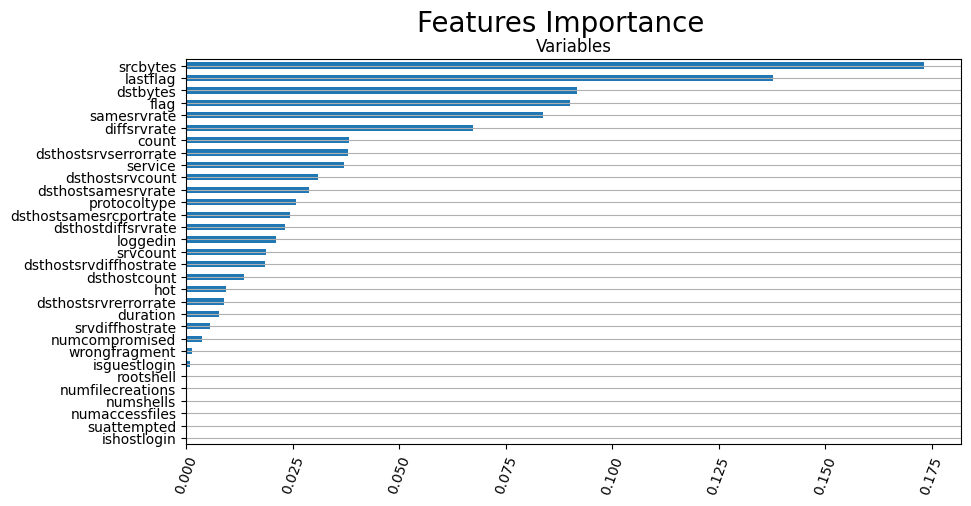

In [320]:
from sklearn import ensemble  # Импортируем библиотеку для работы с моделями ансамблей

'''
Оцениваем важность каждой фичи с помощью RandomForestClassifier
'''

# Создаем объект StandardScaler
scaler = StandardScaler()

# Обучаем scaler на данных X
scaler.fit(X)

# Применяем трансформацию к тренировочным и тестовым данным
X_dop = scaler.transform(X)


# Превращаем numpy массивы обратно в DataFrame
X_dop = pd.DataFrame(X_dop, columns=X.columns)

# Преобразование сбалансированного набора данных в массивы значений
X_ = X_dop.values  # Признаки
y_ = y.values  # Целевая переменная

# Получаем имена признаков из DataFrame
feature_names = X.columns.tolist()  # Список имен столбцов в X

# Инициализация модели Random Forest для классификации
model = ensemble.RandomForestClassifier(n_estimators=100,  # Количество деревьев в лесу
                                         criterion="entropy",  # Критерий для оценки качества разбиения
                                         random_state=0)  # Задаем seed для воспроизводимости

# Обучение модели на подготовленных данных
model.fit(X_, y_)

# Оценка важности признаков
importances = model.feature_importances_  # Оценки важности всех признаков модели

# Создаем DataFrame для хранения важностей признаков
dtf_importances = pd.DataFrame({
    "IMPORTANCE": importances,  # Столбец с важностями
    "VARIABLE": feature_names   # Столбец с именами признаков
}).sort_values("IMPORTANCE", ascending=False)  # Сортируем по убыванию важности

# Добавляем столбец с кумулятивной суммой важностей
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)

# Устанавливаем имена признаков в качестве индексов
dtf_importances = dtf_importances.set_index("VARIABLE")

## Настройка графика
'''
Формируем надписи для графика
- ticks: местоположения меток по оси x (можно передать пустой список для удаления меток).
- labels: метки для размещения в заданных местах тиков (можно передать только в случае наличия тиков).
- kwargs: текстовые свойства для изменения оформления меток.
Функция Matplotlib xticks() возвращает:
- locs: список местоположений xtick.
- labels: список текстовых объектов xlabel.
plt.grid: Настройка линий сетки.
'''

# Создание графика
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(10, 5), dpi=100)  # Инициализация фигуры и осей
fig.suptitle("Features Importance", fontsize=20)  # Заголовок графика
ax.title.set_text('Variables')  # Подпись оси

# Построение горизонтальной столбчатой диаграммы важности признаков
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh",  # Тип графика - горизонтальная столбчатая диаграмма
    legend=False,  # Отключаем легенду
    ax=ax  # Указываем ось для построения
).grid(axis="x")  # Настраиваем  сетку по оси x

ax.set(ylabel="")  # Удаляем метку по оси y, если она не нужна

plt.xticks(rotation=70)  # Поворот меток по оси x на 70 градусов для лучшей читаемости
plt.grid(axis='both')  # Настройка линий сетки по обеим осям

'''
Отрисовываем график
'''
plt.show()  # Показываем график на экране

In [321]:
feature_names = X.columns.tolist()# имена столбцов в data.
print(feature_names)

['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'wrongfragment', 'hot', 'loggedin', 'numcompromised', 'rootshell', 'suattempted', 'numfilecreations', 'numshells', 'numaccessfiles', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostsrvserrorrate', 'dsthostsrvrerrorrate', 'lastflag']


In [322]:
# Указанные столбцы, которые мы хотим сохранить
columns_to_keep = ['srcbytes', 'lastflag', 'protocoltype', 'count', 'dstbytes', 'service', 'diffsrvrate', 'flag', 'srvcount',  'samesrvrate', 'dsthostsrvcount', 'dsthostdiffsrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvserrorrate',  'loggedin', 'dsthostsamesrvrate']

# Удаляем все столбцы, кроме указанных
X = X[columns_to_keep]

In [323]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [324]:
# Создаем объект StandardScaler, который будет использоваться для стандартизации данных
scaler = StandardScaler()

# Применяем метод fit к данным X, чтобы вычислить среднее и стандартное отклонение,
# необходимые для стандартизации
scaler.fit(X)

# Применяем метод transform к данным X, чтобы преобразовать их на основе вычисленных значений,
# то есть стандартизируем данные (вычитаем среднее и делим на стандартное отклонение)
X_transformed = scaler.transform(X_train)

# Применяем метод transform к данным X, чтобы преобразовать их на основе вычисленных значений,
# то есть стандартизируем данные (вычитаем среднее и делим на стандартное отклонение)
X_transformed_test = scaler.transform(X_test)



    Random Forest (Случайный лес):

    Особенность: Это ансамблевая модель, использующая множество деревьев решений. Она объединяет результаты нескольких деревьев для улучшения точности и уменьшения переобучения.
    Как работает: Каждое дерево обучения строится на случайной выборке данных и случайной подвыборке признаков. Предсказания каждого дерева аггрегируются (чаще всего голосованием для классификации и средним для регрессии).

    Gradient Boosting (Градиентный бустинг):

    Особенность: Эта техника строит модель последовательно, где каждое новое дерево исправляет ошибки предыдущих. Это делает модель более точной.
    Как работает: Градиентный бустинг минимизирует ошибку, используя градиентный спуск. Каждое последующее дерево обучается на остатках (ошибках) предыдущего дерева, что позволяет улучшать результаты предсказаний.

    Naive Bayes (Наивный байесовский классификатор):

    Особенность: Основан на теореме Байеса и предполагает, что все признаки независимы друг от друга. Это делает его простым и быстрым в обучении.
    Как работает: Рассчитывает вероятность принадлежности к каждому классу, используя условные вероятности признаков. Выбирает класс с максимальной вероятностью как результат.

    Regularized Logistic Regression (Регуляризованная логистическая регрессия):

    Особенность: Это разновидность логистической регрессии, которая включает регуляризацию для предотвращения переобучения.
    Как работает: Использует логистическую функцию для моделирования вероятности принадлежности к классу, добавляя штраф (L1 или L2) в функцию потерь, чтобы управлять сложностью модели.

    XGBoost:

    Особенность: Это продвинутый алгоритм градиентного бустинга, который оптимизирован для скорости и производительности. Популярен в конкурсах по анализу данных.
    Как работает: Объединяет идеи градиентного бустинга и регуляризации. Эффективно использует параллельное вычисление и обработку отсутствующих данных, улучшая общую производительность модели.

    Decision Tree (Дерево решений):

    Особенность: Простой и легко интерпретируемый метод. Дерево решений делит данные на подгруппы на основе значений признаков.
    Как работает: Построение дерева начинается с корня, затем включает узлы (разделения) и листья (результаты), где каждое разделение выбирается в зависимости от наилучшего критерия (например, прирост информации).

    Support Vector Machine (Метод опорных векторов):

    Особенность: Это мощный метод, подходящий как для линейной, так и для нелинейной классификации. Работает в высокоразмерных пространствах.
    Как работает: Находит гиперплоскость, которая максимизирует расстояние между классами. При использовании ядровых функций может эффективно решать задачи в нелинейной области.


In [325]:
#Случайный лес (Random Forest)
# Создаем модель случайного леса
rf_classifier = RandomForestClassifier()

# Обучаем модель
rf_classifier.fit(X_transformed, y_train)

RandomForestClassifier()

In [326]:
labels = ['Non attack', 'attack']
prediction = rf_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       1.00      1.00      1.00     21439
      attack       1.00      1.00      1.00     23117

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556



In [327]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [328]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9987880420145435


In [329]:
results_test = {
    "Random Forest":  f"{round(accuracy, 4) * 100}%"
}

In [330]:
#Градиентный бустинг (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

# Создаем модель градиентного бустинга
gb_classifier = GradientBoostingClassifier()

# Обучаем модель
gb_classifier.fit(X_transformed, y_train)

GradientBoostingClassifier()

In [331]:
labels = ['Non attack', 'attack']
prediction = gb_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       0.99      1.00      0.99     21439
      attack       1.00      0.99      0.99     23117

    accuracy                           0.99     44556
   macro avg       0.99      0.99      0.99     44556
weighted avg       0.99      0.99      0.99     44556



In [332]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [333]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9913143011042284


In [334]:
results_test["Gradient Boosting"] =  f"{round(accuracy, 4) * 100}%"

In [335]:
#Наивный байесовский классификатор (Naive Bayes Classifier)
from sklearn.naive_bayes import GaussianNB

# Создаем модель наивного байесовского классификатора
nb_classifier = GaussianNB()

# Обучаем модель
nb_classifier.fit(X_transformed, y_train)

GaussianNB()

In [336]:
labels = ['Non attack', 'attack']
prediction = nb_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       0.92      0.83      0.87     21439
      attack       0.86      0.93      0.89     23117

    accuracy                           0.88     44556
   macro avg       0.89      0.88      0.88     44556
weighted avg       0.89      0.88      0.88     44556



In [337]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [338]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.883090941736242


In [339]:
results_test["Naive Bayes"] =  f"{round(accuracy, 4) * 100}%"

In [340]:
#Логистическая регрессия с регуляризацией (Regularized Logistic Regression)
from sklearn.linear_model import LogisticRegressionCV

# Создаем модель логистической регрессии
log_reg_cv = LogisticRegressionCV()

# Обучаем модель
log_reg_cv.fit(X_transformed, y_train)

LogisticRegressionCV()

In [341]:
labels = ['Non attack', 'attack']
prediction = log_reg_cv.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       0.95      0.96      0.96     21439
      attack       0.96      0.96      0.96     23117

    accuracy                           0.96     44556
   macro avg       0.96      0.96      0.96     44556
weighted avg       0.96      0.96      0.96     44556



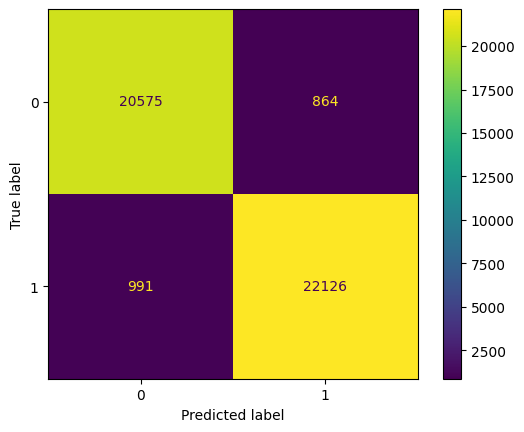

In [342]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [343]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9583669988329293


In [344]:
results_test["LogisticRegressionCV"] =  f"{round(accuracy, 4) * 100}%"

In [345]:
#Extreme Gradient Boosting (XGBoost)

from xgboost import XGBClassifier

# Создаем модель XGBoost
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Обучаем модель
xgb_classifier.fit(X_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [346]:
labels = ['Non attack', 'attack']
prediction = xgb_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       1.00      1.00      1.00     21439
      attack       1.00      1.00      1.00     23117

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556



In [347]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [348]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9989675913457222


In [349]:
results_test["XGBClassifier"] =  f"{round(accuracy, 4) * 100}%"

In [350]:
#Дерево решений (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# Создаем модель дерева решений
dt_classifier = DecisionTreeClassifier()

# Обучаем модель
dt_classifier.fit(X_transformed, y_train)

DecisionTreeClassifier()

In [351]:
labels = ['Non attack', 'attack']
prediction = dt_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       1.00      1.00      1.00     21439
      attack       1.00      1.00      1.00     23117

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556



In [352]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [353]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9980922883562259


In [354]:
results_test["DecisionTreeClassifier"] =  f"{round(accuracy, 4) * 100}%"

In [355]:
#Метод опорных векторов (Support Vector Machine)
from sklearn.svm import SVC
# Создаем модель SVM
svm_classifier = SVC()

# Обучаем модель
svm_classifier.fit(X_transformed, y_train)

SVC()

In [356]:
labels = ['Non attack', 'attack']
prediction = svm_classifier.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       0.99      1.00      0.99     21439
      attack       1.00      0.99      0.99     23117

    accuracy                           0.99     44556
   macro avg       0.99      0.99      0.99     44556
weighted avg       0.99      0.99      0.99     44556



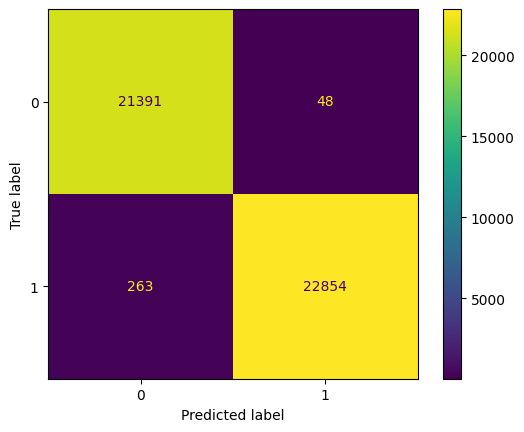

In [357]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [358]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9930200197504264


In [359]:
results_test["SVC"] =  f"{round(accuracy, 4) * 100}%"

In [360]:
#Логистическая регрессия (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Создаем модель логистической регрессии
log_reg = LogisticRegression()

# Обучаем модель
log_reg.fit(X_transformed, y_train)

LogisticRegression()

In [361]:
labels = ['Non attack', 'attack']
prediction = log_reg.predict(X_transformed_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

  Non attack       0.95      0.96      0.96     21439
      attack       0.96      0.96      0.96     23117

    accuracy                           0.96     44556
   macro avg       0.96      0.96      0.96     44556
weighted avg       0.96      0.96      0.96     44556



In [362]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [363]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9579854565041745


In [364]:
results_test["LogisticRegression"] =  f"{round(accuracy, 4) * 100}%"

In [365]:
for key, value in results_test.items():
    print(f"{key}: {value}")

Random Forest: 99.88%
Gradient Boosting: 99.13%
Naive Bayes: 88.31%
LogisticRegressionCV: 95.84%
XGBClassifier: 99.9%
DecisionTreeClassifier: 99.81%
SVC: 99.3%
LogisticRegression: 95.8%


#Лучшие результаты показала модель XGBClassifier

## Мультиномиальная классификация



In [423]:
df = pd.read_csv("Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df

duration protocoltype   service flag  srcbytes  dstbytes  land  \
0              0          tcp  ftp_data   SF       491         0     0   
1              0          udp     other   SF       146         0     0   
2              0          tcp   private   S0         0         0     0   
3              0          tcp      http   SF       232      8153     0   
4              0          tcp      http   SF       199       420     0   
...          ...          ...       ...  ...       ...       ...   ...   
125968         0          tcp   private   S0         0         0     0   
125969         8          udp   private   SF       105       145     0   
125970         0          tcp      smtp   SF      2231       384     0   
125971         0          tcp    klogin   S0         0         0     0   
125972         0          tcp  ftp_data   SF       151         0     0   

        wrongfragment  urgent  hot  ...  dsthostsamesrvrate  \
0                   0       0    0  ...                0.17   
1                   0       0    0  ...                0.00   
2                   0       0    0  ...                0.10   
3                   0       0    0  ...                1.00   
4                   0       0    0  ...                1.00   
...               ...     ...  ...  ...                 ...   
125968              0       0    0  ...                0.10   
125969              0       0    0  ...                0.96   
125970              0       0    0  ...                0.12   
125971              0       0    0  ...                0.03   
125972              0       0    0  ...                0.30   

        dsthostdiffsrvrate  dsthostsamesrcportrate  dsthostsrvdiffhostrate  \
0                     0.03                    0.17                    0.00   
1                     0.60                    0.88                    0.00   
2                     0.05                    0.00                    0.00   
3                     0.00                    0.03                    0.04   
4                     0.00                    0.00                    0.00   
...                    ...                     ...                     ...   
125968                0.06                    0.00                    0.00   
125969                0.01                    0.01                    0.00   
125970                0.06                    0.00                    0.00   
125971                0.05                    0.00                    0.00   
125972                0.03                    0.30                    0.00   

        dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
0                    0.00                  0.00               0.05   
1                    0.00                  0.00               0.00   
2                    1.00                  1.00               0.00   
3                    0.03                  0.01               0.00   
4                    0.00                  0.00               0.00   
...                   ...                   ...                ...   
125968               1.00                  1.00               0.00   
125969               0.00                  0.00               0.00   
125970               0.72                  0.00               0.01   
125971               1.00                  1.00               0.00   
125972               0.00                  0.00               0.00   

        dsthostsrvrerrorrate   attack  lastflag  
0                       0.00   normal        20  
1                       0.00   normal        15  
2                       0.00  neptune        19  
3                       0.01   normal        21  
4                       0.00   normal        21  
...                      ...      ...       ...  
125968                  0.00  neptune        20  
125969                  0.00   normal        21  
125970                  0.00   normal        18  
125971                  0.00  neptune        20  
125972                  0.00   nor

In [424]:
df_test = pd.read_csv("Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df_test

duration protocoltype   service  flag  srcbytes  dstbytes  land  \
0             0          tcp   private   REJ         0         0     0   
1             0          tcp   private   REJ         0         0     0   
2             2          tcp  ftp_data    SF     12983         0     0   
3             0         icmp     eco_i    SF        20         0     0   
4             1          tcp    telnet  RSTO         0        15     0   
...         ...          ...       ...   ...       ...       ...   ...   
22539         0          tcp      smtp    SF       794       333     0   
22540         0          tcp      http    SF       317       938     0   
22541         0          tcp      http    SF     54540      8314     0   
22542         0          udp  domain_u    SF        42        42     0   
22543         0          tcp    sunrpc   REJ         0         0     0   

       wrongfragment  urgent  hot  ...  dsthostsamesrvrate  \
0                  0       0    0  ...                0.04   
1                  0       0    0  ...                0.00   
2                  0       0    0  ...                0.61   
3                  0       0    0  ...                1.00   
4                  0       0    0  ...                0.31   
...              ...     ...  ...  ...                 ...   
22539              0       0    0  ...                0.72   
22540              0       0    0  ...                1.00   
22541              0       0    2  ...                1.00   
22542              0       0    0  ...                0.99   
22543              0       0    0  ...                0.08   

       dsthostdiffsrvrate  dsthostsamesrcportrate  dsthostsrvdiffhostrate  \
0                    0.06                    0.00                    0.00   
1                    0.06                    0.00                    0.00   
2                    0.04                    0.61                    0.02   
3                    0.00                    1.00                    0.28   
4                    0.17                    0.03                    0.02   
...                   ...                     ...                     ...   
22539                0.06                    0.01                    0.01   
22540                0.00                    0.01                    0.01   
22541                0.00                    0.00                    0.00   
22542                0.01                    0.00                    0.00   
22543                0.03                    0.00                    0.00   

       dsthostserrorrate  dsthostsrvserrorrate  dsthostrerrorrate  \
0                   0.00                   0.0               1.00   
1                   0.00                   0.0               1.00   
2                   0.00                   0.0               0.00   
3                   0.00                   0.0               0.00   
4                   0.00                   0.0               0.83   
...                  ...                   ...                ...   
22539               0.01                   0.0               0.00   
22540               0.01                   0.0               0.00   
22541               0.00                   0.0               0.07   
22542               0.00                   0.0               0.00   
22543               0.00                   0.0               0.44   

       dsthostsrvrerrorrate   attack  lastflag  
0                      1.00  neptune        21  
1                      1.00  neptune        21  
2                      0.00   normal        21  
3                      0.00    saint        15  
4                      0.71    mscan        11  
...                     ...      ...       ...  
22539                  0.00   normal        21  
22540                  0.00   normal        21  
22541                  0.07     back        15  
22542                  0.00   normal        21  
22543                  1.00    mscan        14  

[22544 rows x 43 columns]

In [425]:
combined_df = pd.concat([df, df_test], ignore_index=True)


In [426]:
# Подсчет количества всех типов атак
attack_counts = combined_df['attack'].value_counts()

# Вывод результата
print("Количество атак по типам:")
print(attack_counts)

Количество атак по типам:
attack
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack        

In [427]:
combined_df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [428]:
combined_df['attack'].loc[combined_df['attack'] == 'neptune'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'satan'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'ipsweep'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'smurf'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'portsweep'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'nmap'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'back'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'guess_passwd'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'mscan'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'warezmaster'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'teardrop'] = 'U2R'
combined_df['attack'].loc[combined_df['attack'] == 'warezclient'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'apache2'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'processtable'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'snmpguess'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'saint'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'mailbomb'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'pod'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'snmpgetattack'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'httptunnel'] = 'R2L'


combined_df['attack'].loc[combined_df['attack'] == 'buffer_overflow'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'land'] = 'Ddos'
combined_df['attack'].loc[combined_df['attack'] == 'multihop'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'rootkit'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'named'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'ps'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'sendmail'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'xterm'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'imap'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'loadmodule'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'ftp_write'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'xlock'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'phf'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'perl'] = 'U2R'
combined_df['attack'].loc[combined_df['attack'] == 'xsnoop'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'spy'] = 'Prob'
combined_df['attack'].loc[combined_df['attack'] == 'worm'] = 'U2R'
combined_df['attack'].loc[combined_df['attack'] == 'sqlattack'] = 'R2L'
combined_df['attack'].loc[combined_df['attack'] == 'udpstorm'] = 'Ddos'



attack
normal    77054
Ddos      52239
Prob      14152
R2L        4161
U2R         911
Name: count, dtype: int64


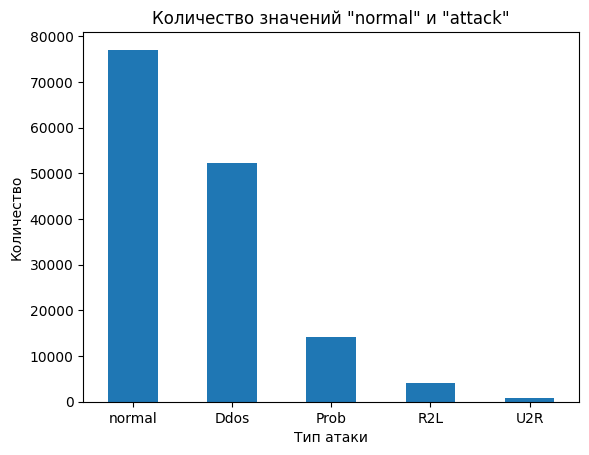

In [429]:
count = combined_df['attack'].value_counts()

# Вывод количества значений
print(count)

# Построение гистограммы
count.plot(kind='bar')
plt.title('Количество значений "normal" и "attack"')
plt.xlabel('Тип атаки')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

In [430]:
le=LabelEncoder()

# Преобразуем столбец 'protocoltype' в числовые значения с помощью кодировщика LabelEncoder
combined_df['protocoltype'] = le.fit_transform(combined_df['protocoltype'])

# Преобразуем столбец 'service' в числовые значения с помощью кодировщика LabelEncoder
combined_df['service'] = le.fit_transform(combined_df['service'])

# Преобразуем столбец 'flag' в числовые значения с помощью кодировщика LabelEncoder
combined_df['flag'] = le.fit_transform(combined_df['flag'])

# Преобразуем столбец 'attack' в числовые значения с помощью кодировщика LabelEncoder
combined_df['attack'] = le.fit_transform(combined_df['attack'])

In [431]:
# Подсчет количества всех типов атак
attack_counts = combined_df['attack'].value_counts()

# Вывод результата
print("Количество атак по типам:")
print(attack_counts)

Количество атак по типам:
attack
4    77054
0    52239
1    14152
2     4161
3      911
Name: count, dtype: int64


In [432]:
combined_df.drop(['numroot','serrorrate','rerrorrate','dsthostrerrorrate', 'srvserrorrate', 'dsthostserrorrate', 'srvrerrorrate',  ],axis=1,inplace=True)

In [433]:

X=combined_df.drop(['attack'],axis=1)
y=combined_df['attack']

#Применяем метод RandomOverSampler over_sampling
from imblearn.over_sampling import RandomOverSampler

'''
Этот метод случайным образом выбирает примеры из класса-меньшинства и дублирует их, пока не достигнется баланс.
'''

# Создание экземпляра RandomOverSampler
ros = RandomOverSampler()

# Применение увеличения выборки к данным
X_resampled, y_resampled = ros.fit_resample(X, y)

In [434]:
from collections import Counter
Counter(y_resampled)

Counter({4: 77054, 0: 77054, 2: 77054, 1: 77054, 3: 77054})

attack
4    77054
0    77054
2    77054
1    77054
3    77054
Name: count, dtype: int64


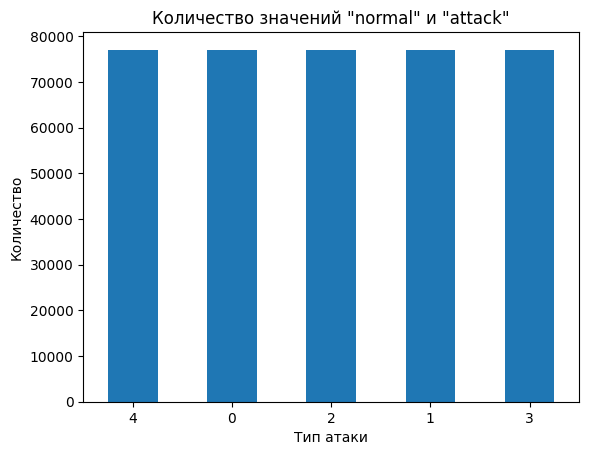

In [435]:
balance_df = pd.concat([X_resampled, y_resampled], axis=1)
count = balance_df['attack'].value_counts()

# Вывод количества значений
print(count)

# Построение гистограммы
count.plot(kind='bar')
plt.title('Количество значений "normal" и "attack"')
plt.xlabel('Тип атаки')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

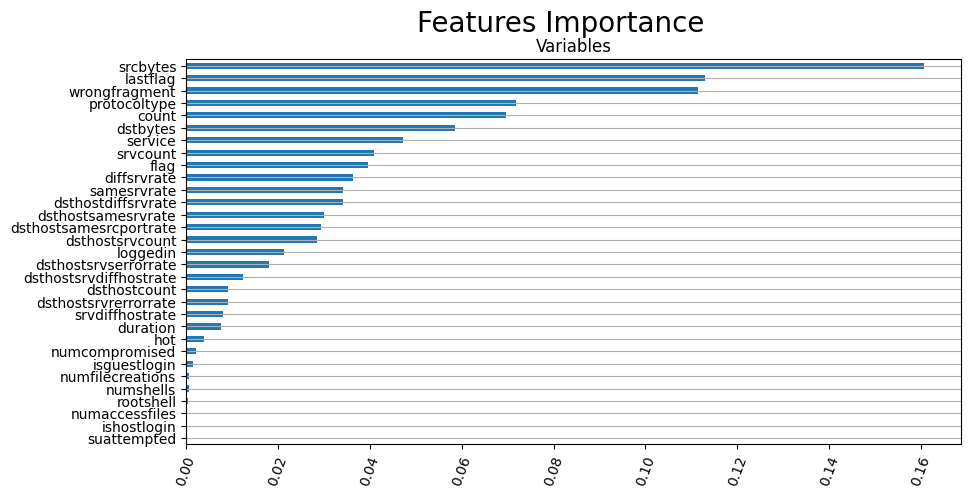

In [436]:
from sklearn import ensemble  # Импортируем библиотеку для работы с моделями ансамблей

'''
Оцениваем важность каждой фичи с помощью RandomForestClassifier
'''

# Создаем объект StandardScaler
scaler = StandardScaler()

# Обучаем scaler на данных X
scaler.fit(X_resampled)

# Применяем трансформацию к тренировочным и тестовым данным
X_dop = scaler.transform(X_resampled)


# Превращаем numpy массивы обратно в DataFrame
X_dop = pd.DataFrame(X_dop, columns=X_resampled.columns)

# Преобразование сбалансированного набора данных в массивы значений
X = X_dop.values  # Признаки
y = y_resampled.values  # Целевая переменная

# Получаем имена признаков из DataFrame
feature_names = X_resampled.columns.tolist()  # Список имен столбцов в X_resampled


# Инициализация модели Random Forest для классификации
model = ensemble.RandomForestClassifier(n_estimators=100,  # Количество деревьев в лесу
                                         criterion="entropy",  # Критерий для оценки качества разбиения
                                         random_state=0)  # Задаем seed для воспроизводимости

# Обучение модели на подготовленных данных
model.fit(X, y)

# Оценка важности признаков
importances = model.feature_importances_  # Оценки важности всех признаков модели

# Создаем DataFrame для хранения важностей признаков
dtf_importances = pd.DataFrame({
    "IMPORTANCE": importances,  # Столбец с важностями
    "VARIABLE": feature_names   # Столбец с именами признаков
}).sort_values("IMPORTANCE", ascending=False)  # Сортируем по убыванию важности

# Добавляем столбец с кумулятивной суммой важностей
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)

# Устанавливаем имена признаков в качестве индексов
dtf_importances = dtf_importances.set_index("VARIABLE")

## Настройка графика
'''
Формируем надписи для графика
- ticks: местоположения меток по оси x (можно передать пустой список для удаления меток).
- labels: метки для размещения в заданных местах тиков (можно передать только в случае наличия тиков).
- kwargs: текстовые свойства для изменения оформления меток.
Функция Matplotlib xticks() возвращает:
- locs: список местоположений xtick.
- labels: список текстовых объектов xlabel.
plt.grid: Настройка линий сетки.
'''

# Создание графика
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(10, 5), dpi=100)  # Инициализация фигуры и осей
fig.suptitle("Features Importance", fontsize=20)  # Заголовок графика
ax.title.set_text('Variables')  # Подпись оси

# Построение горизонтальной столбчатой диаграммы важности признаков
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh",  # Тип графика - горизонтальная столбчатая диаграмма
    legend=False,  # Отключаем легенду
    ax=ax  # Указываем ось для построения
).grid(axis="x")  # Настраиваем  сетку по оси x

ax.set(ylabel="")  # Удаляем метку по оси y, если она не нужна

plt.xticks(rotation=70)  # Поворот меток по оси x на 70 градусов для лучшей читаемости
plt.grid(axis='both')  # Настройка линий сетки по обеим осям

'''
Отрисовываем график
'''
plt.show()  # Показываем график на экране

In [437]:
feature_names = X_resampled.columns.tolist()# имена столбцов в data.
print(feature_names)

['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'wrongfragment', 'hot', 'loggedin', 'numcompromised', 'rootshell', 'suattempted', 'numfilecreations', 'numshells', 'numaccessfiles', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostsrvserrorrate', 'dsthostsrvrerrorrate', 'lastflag']


In [438]:
# Указанные столбцы, которые мы хотим сохранить
columns_to_keep = ['srcbytes', 'wrongfragment', 'lastflag', 'protocoltype', 'count', 'dstbytes', 'service', 'diffsrvrate', 'flag', 'srvcount',  'samesrvrate', 'dsthostsrvcount', 'dsthostdiffsrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvserrorrate',  'loggedin', 'dsthostsamesrvrate']

# Удаляем все столбцы, кроме указанных
X_resampled = X_resampled[columns_to_keep]

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42, stratify = y_resampled)

In [440]:
# Создаем объект StandardScaler, который будет использоваться для стандартизации данных
scaler = StandardScaler()

# Применяем метод fit к данным X, чтобы вычислить среднее и стандартное отклонение,
# необходимые для стандартизации
scaler.fit(X_resampled)

# Применяем метод transform к данным X, чтобы преобразовать их на основе вычисленных значений,
# то есть стандартизируем данные (вычитаем среднее и делим на стандартное отклонение)
X_train = scaler.transform(X_train)

# Применяем метод transform к данным X, чтобы преобразовать их на основе вычисленных значений,
# то есть стандартизируем данные (вычитаем среднее и делим на стандартное отклонение)
X_test = scaler.transform(X_test)

In [441]:
#Случайный лес (Random Forest)
# Создаем модель случайного леса
rf_classifier = RandomForestClassifier()

# Обучаем модель
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [442]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = rf_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       1.00      1.00      1.00     23116
        Prob       1.00      1.00      1.00     23116
         R2L       1.00      1.00      1.00     23116
         U2R       1.00      1.00      1.00     23117
      normal       1.00      1.00      1.00     23116

    accuracy                           1.00    115581
   macro avg       1.00      1.00      1.00    115581
weighted avg       1.00      1.00      1.00    115581



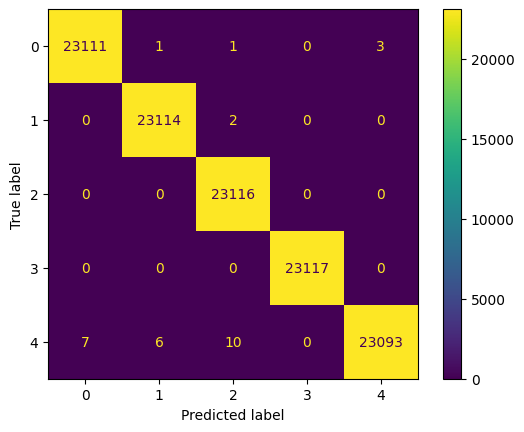

In [443]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [444]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9997404417681107


In [445]:
results_test = {
    "Random Forest":  f"{round(accuracy, 4) * 100}%"
}

In [446]:
#Градиентный бустинг (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

# Создаем модель градиентного бустинга
gb_classifier = GradientBoostingClassifier()

# Обучаем модель
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [447]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = gb_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       1.00      1.00      1.00     23116
        Prob       0.99      0.99      0.99     23116
         R2L       0.99      1.00      0.99     23116
         U2R       1.00      1.00      1.00     23117
      normal       1.00      0.99      0.99     23116

    accuracy                           1.00    115581
   macro avg       1.00      1.00      1.00    115581
weighted avg       1.00      1.00      1.00    115581



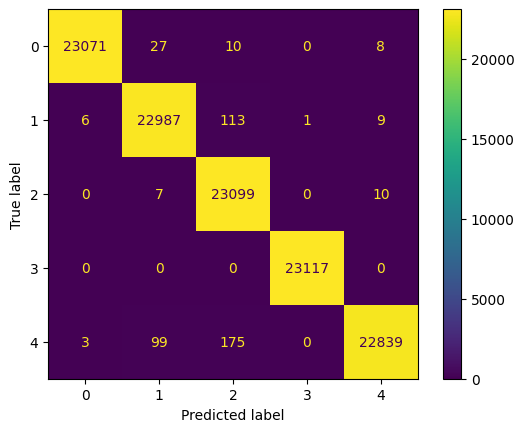

In [448]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [449]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9959508915825266


In [450]:
results_test["Gradient Boosting"] =  f"{round(accuracy, 4) * 100}%"

In [451]:
#Наивный байесовский классификатор (Naive Bayes Classifier)
from sklearn.naive_bayes import GaussianNB

# Создаем модель наивного байесовского классификатора
nb_classifier = GaussianNB()

# Обучаем модель
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [452]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = nb_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       0.80      0.93      0.86     23116
        Prob       0.90      0.61      0.73     23116
         R2L       0.74      0.83      0.78     23116
         U2R       0.99      0.99      0.99     23117
      normal       0.77      0.78      0.77     23116

    accuracy                           0.83    115581
   macro avg       0.84      0.83      0.83    115581
weighted avg       0.84      0.83      0.83    115581



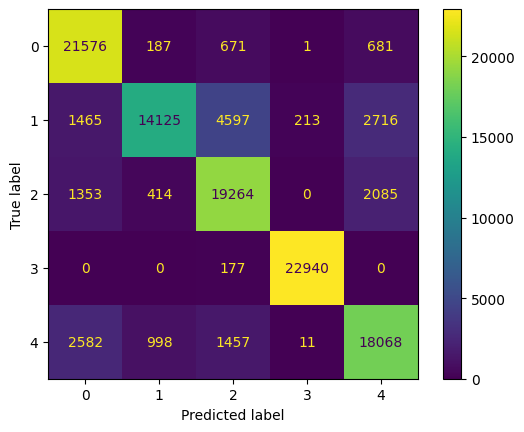

In [453]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [454]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.8303527396371376


In [455]:
results_test["Naive Bayes"] =  f"{round(accuracy, 4) * 100}%"

In [456]:
#Логистическая регрессия с регуляризацией (Regularized Logistic Regression)
from sklearn.linear_model import LogisticRegressionCV

# Создаем модель логистической регрессии
log_reg_cv = LogisticRegressionCV()

# Обучаем модель
log_reg_cv.fit(X_train, y_train)

LogisticRegressionCV()

In [457]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = log_reg_cv.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       0.97      0.95      0.96     23116
        Prob       0.93      0.94      0.93     23116
         R2L       0.91      0.96      0.94     23116
         U2R       1.00      1.00      1.00     23117
      normal       0.98      0.94      0.96     23116

    accuracy                           0.96    115581
   macro avg       0.96      0.96      0.96    115581
weighted avg       0.96      0.96      0.96    115581



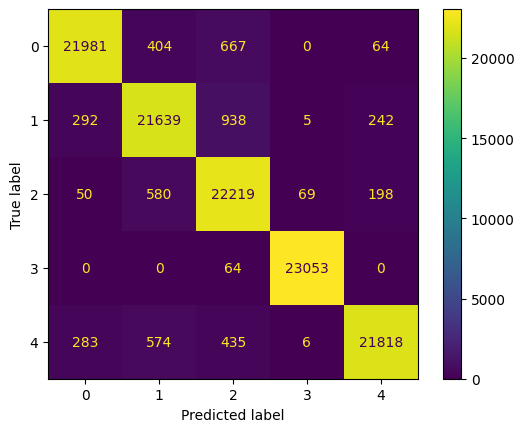

In [458]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [459]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9578563950822367


In [460]:
results_test["LogisticRegressionCV"] =  f"{round(accuracy, 4) * 100}%"

In [461]:
#Extreme Gradient Boosting (XGBoost)

from xgboost import XGBClassifier

# Создаем модель XGBoost
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Обучаем модель
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [462]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = xgb_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       1.00      1.00      1.00     23116
        Prob       1.00      1.00      1.00     23116
         R2L       1.00      1.00      1.00     23116
         U2R       1.00      1.00      1.00     23117
      normal       1.00      1.00      1.00     23116

    accuracy                           1.00    115581
   macro avg       1.00      1.00      1.00    115581
weighted avg       1.00      1.00      1.00    115581



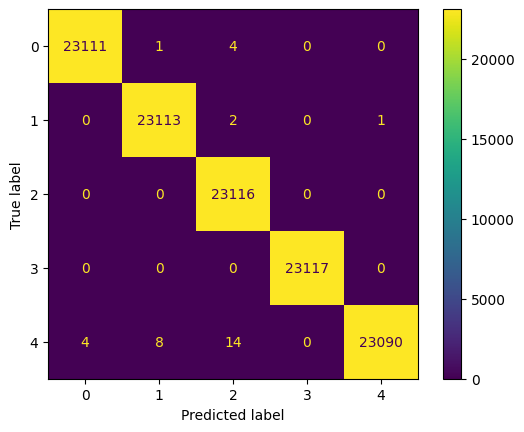

In [463]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [464]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9997058340038588


In [465]:
results_test["XGBClassifier"] =  f"{round(accuracy, 4) * 100}%"

In [466]:
#Дерево решений (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# Создаем модель дерева решений
dt_classifier = DecisionTreeClassifier()

# Обучаем модель
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [467]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = dt_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       1.00      1.00      1.00     23116
        Prob       1.00      1.00      1.00     23116
         R2L       1.00      1.00      1.00     23116
         U2R       1.00      1.00      1.00     23117
      normal       1.00      1.00      1.00     23116

    accuracy                           1.00    115581
   macro avg       1.00      1.00      1.00    115581
weighted avg       1.00      1.00      1.00    115581



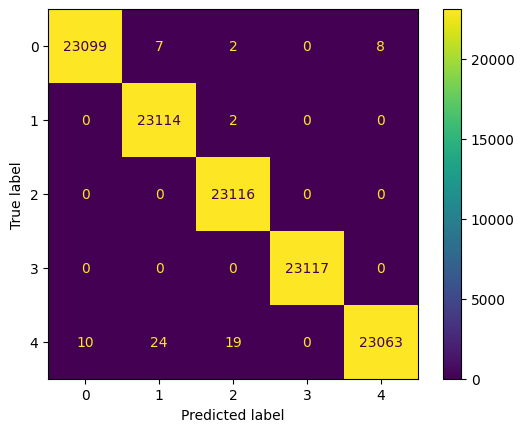

In [468]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [469]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9993770602434656


In [470]:
results_test["DecisionTreeClassifier"] =  f"{round(accuracy, 4) * 100}%"

In [471]:
#Метод опорных векторов (Support Vector Machine)
from sklearn.svm import SVC
# Создаем модель SVM
svm_classifier = SVC()

# Обучаем модель
svm_classifier.fit(X_train, y_train)

SVC()

In [472]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = svm_classifier.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       1.00      0.99      0.99     23116
        Prob       0.99      0.99      0.99     23116
         R2L       0.98      0.99      0.99     23116
         U2R       1.00      1.00      1.00     23117
      normal       1.00      0.98      0.99     23116

    accuracy                           0.99    115581
   macro avg       0.99      0.99      0.99    115581
weighted avg       0.99      0.99      0.99    115581



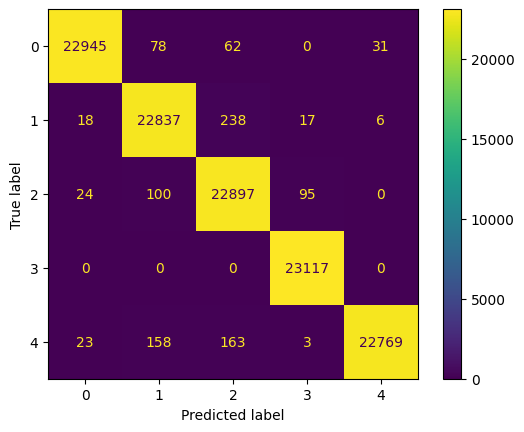

In [473]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [474]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9912096278800149


In [475]:
results_test["SVC"] =  f"{round(accuracy, 4) * 100}%"

In [476]:
#Логистическая регрессия (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Создаем модель логистической регрессии
log_reg = LogisticRegression()

# Обучаем модель
log_reg.fit(X_train, y_train)

LogisticRegression()

In [477]:
labels = ['Ddos', 'Prob', 'R2L', 'U2R', 'normal']
prediction = log_reg.predict(X_test)
print(classification_report(y_test, prediction, target_names=labels))

              precision    recall  f1-score   support

        Ddos       0.97      0.95      0.96     23116
        Prob       0.93      0.94      0.93     23116
         R2L       0.91      0.96      0.93     23116
         U2R       1.00      0.99      1.00     23117
      normal       0.98      0.94      0.96     23116

    accuracy                           0.96    115581
   macro avg       0.96      0.96      0.96    115581
weighted avg       0.96      0.96      0.96    115581



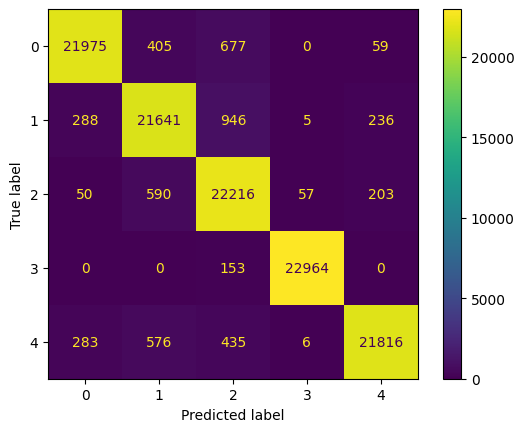

In [478]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [479]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9570085048580649


In [480]:
results_test["LogisticRegression"] =  f"{round(accuracy, 4) * 100}%"

In [481]:
for key, value in results_test.items():
    print(f"{key}: {value}")

Random Forest: 99.97%
Gradient Boosting: 99.6%
Naive Bayes: 83.04%
LogisticRegressionCV: 95.78999999999999%
XGBClassifier: 99.97%
DecisionTreeClassifier: 99.94%
SVC: 99.11999999999999%
LogisticRegression: 95.7%


## Одной из лучших моделей, как и в случае с бинарной классификацей, оказалась XGBClassifier